# Carga de datos

In [18]:
from google.colab import drive
drive.mount('/content/drive')
dir = '/content/drive/MyDrive/UNAM/9no Semestre/TSP II - Ciencia de datos/DataSets'
%cd $dir
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from scipy.io import loadmat
from sklearn.cluster import KMeans 
from mpl_toolkits import mplot3d


import seaborn as sns

from sklearn.preprocessing import StandardScaler, normalize

from sklearn.decomposition import PCA


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/UNAM/9no Semestre/TSP II - Ciencia de datos/DataSets


# Procesamiento de datos

In [3]:
datos = loadmat('yeast.mat')
x = datos['data']
x.shape
g,p = x.shape

384 tipos de genes medidos en 17 instantes de tiempo diferentes.

Se mide el nivel de expresión que tienen los genes

Graficaremos los datos y posteriormente haremos una normalización para poder observar de una mejor manera su comportamiento

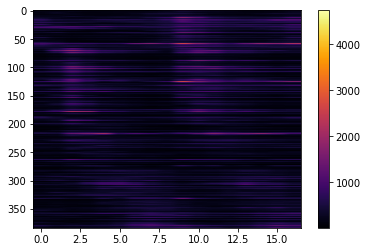

In [4]:
plt.imshow(x,aspect='auto',cmap='inferno')
plt.colorbar()

In [5]:
x_t = np.zeros((g,p))#Matriz del mismo tamaño de x, llena de ceros

#Realizamos una normalización/transformación z-score
def z_score(g,p):
  for i in range(g): #recorremos cada fila
    desv_est = np.std(x[i,:])
    media = np.mean(x[i,:])
    x_t[i,:] = (x[i,:]-media)/desv_est #z-score
  
  plt.imshow(x_t,aspect='auto',cmap='hot')
  plt.colorbar

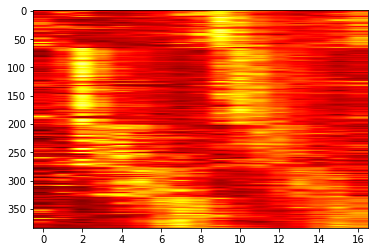

In [6]:
z_score(g,p)

# Análisis de componentes principales

Se obtiene la matriz de covarianza entre los genes y la matriz de covarianza entre las levaduras

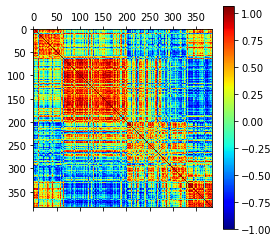

In [7]:
matriz_covarianza_g = np.cov(x_t)
plt.matshow(matriz_covarianza_g,cmap='jet')
plt.colorbar()

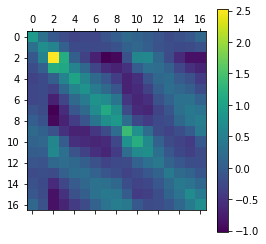

In [8]:
matriz_covarianza_l = np.cov(x_t.T)
plt.matshow(matriz_covarianza_l,cmap='viridis')
plt.colorbar()

- Se obtienen los eigenvalores y eigenvectores.
- Obtenemos la suma de los eigen valores y después dividimos cada eigenvalor entre la suma, para así observar la proporción de cada valor

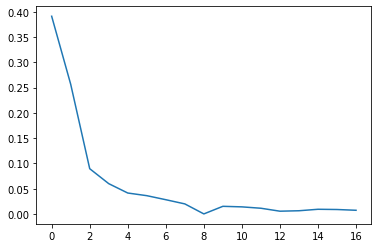

In [9]:
eigval,eigvec = np.linalg.eig(matriz_covarianza_l)
sum_eigv = np.sum(eigval)
plt.plot(eigval/sum_eigv)

**Se observa que el primer valor contiene casi el 40% de la suma total**

Después se obtiene la suma acumulada y calcula la división de la suma acumulada por la suma total

73.76143023377095


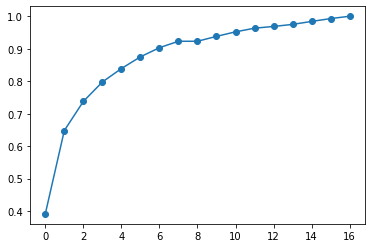

In [10]:
sum_acum=np.cumsum(eigval)
var = sum_acum/sum_eigv
print(var[2]*100)
plt.plot(var,'o-')



- **Usando los 3 primeros valores  se mantiene cerca del 73.76% de varianza**




Vamos a proyectar datos sobre los eigenvalores, vamos a tomar los primeros 3 para hacer la proyección




In [11]:
P = eigvec[:,[0,1,2]] 
x_p = np.matmul(x_t,P)#Tomo la x proyectada y la multiplico por los eigenvectores
x_p.shape #Reduzco la dimensión de 38 a 3

(384, 3)

In [12]:
#Se define el número de clusters
kmeans = KMeans(n_clusters=4).fit(x_p)

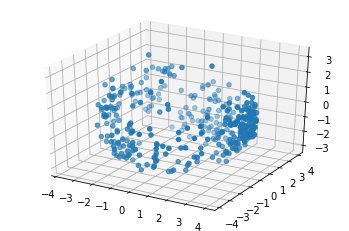

In [13]:
#Se hace una gráfica sencilla para observar el comportamiento de los datos
ax = plt.axes(projection ='3d')
ax.scatter3D(x_p[:,0],x_p[:,1],x_p[:,2])

In [14]:
#Se crea un data set con las columnas de x_p (x proyectada) para usar la biblioteca solicitada
dataset = pd.DataFrame({'PC1':x_p[:,0],'PC2':x_p[:,1],'PC3':x_p[:,2]})
#Se cra una columna con kmeans.labels_, para saber a qué cluster pertenece cada punto
c_cluster = pd.DataFrame({'Cluster':kmeans.labels_})
#Se crea un nuevo dataset, añadiendo la columna antes creada
dataset_2=dataset.assign( CLUSTER=c_cluster)
fig=px.scatter_3d(dataset_2,x='PC1',y='PC2',z='PC3',color="CLUSTER")

# Resultados

- Comentario sobre la estructura de los datos proyectados en las componentes principales: 

  - Con base en las gráficas obtenidas, se obtiene una clase esfera, sin embargo sobre el plano PC1 vs PC2  se logran observar ciertos valores, esto para un valor de P3 aproximadamente de 3, en contraste con valores de PC3 aproximadamente de 0, donde no hay muchos valores sobre el plano PC1 vs PC2

  - Es importante mencionar que no se cuenta con mucha información de fondo para proponer un número de clusters determinado, sin embargo, al realizarse 2 mediciones para los mismos parámetros, se proponen 4 clusters, ya que la esféra podría "seccionarse en 4 porciones" y tener 2 clusters por medición.  


- El porcentaje de varianza que se mantiene en la proyección es: 73.76%



- Implementación de la biblioteca plotly para graficar

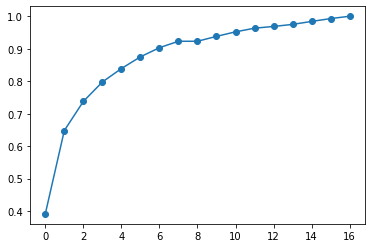

In [15]:
plt.plot(var,'o-')

In [16]:
fig.show()

In [22]:
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(x)

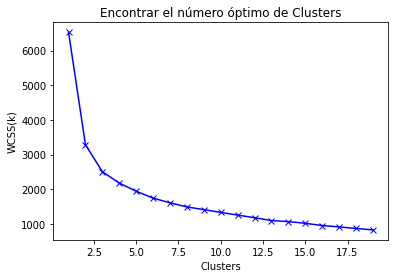

In [23]:
scores_1 = []
range_values = range(1, 20) #Debe comenzar en 1

#Aplicamos kmeans un total de 20 veces
for i in range_values:
    kmeans = KMeans(n_clusters = i)  #El número de clusters irá incrementando en cada ciclo
    kmeans.fit(creditcard_df_scaled) #Ajustamos los datos hasta que el algoritmo de kmean converga
    scores_1.append(kmeans.inertia_) #WCSS, guardamos los scores en una lista

#X es el número de clusters
#Y es WCSS para cada cluster
plt.plot(range_values, scores_1, 'bx-') #Marca con una x y une todo con una línea
plt.title("Encontrar el número óptimo de Clusters")
plt.xlabel("Clusters")
plt.ylabel("WCSS(k)")
plt.show()

# Gráfica con matplot, ignorar.

In [ ]:
ax = plt.axes(projection = '3d')
for i in range (x_p.shape[0]):
  if kmeans.labels_[i]==0:
    ax.scatter3D(x_p[i,0],x_p[i,1],x_p[i,2],color='red',alpha=0.25)
  elif kmeans.labels_[i]==1:
    ax.scatter3D(x_p[i,0],x_p[i,1],x_p[i,2],color='green',alpha=0.25)
  elif kmeans.labels_[i]==2:
    ax.scatter3D(x_p[i,0],x_p[i,1],x_p[i,2],color='blue',alpha=0.25)
  elif kmeans.labels_[i]==3:
    ax.scatter3D(x_p[i,0],x_p[i,1],x_p[i,2],color='yellow',alpha=0.25)